## Final project

text stuff to do: 
- clean encoding (ÛÏ) 
- count hashtags, @ signs, urls, punctuation, sentence to punctuation ratio
- :pparrot: emojis???
- general research to tokenize tweets & try out different tokenizing methods
- remove punctuation 
- use SVD to condense, try PCA
- remove stuff to make it look like final project
- research to see how we can use location or keywords

ask john:
- best way to clean encoding
- how to add features to model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from pathlib import Path
import spacy

In [2]:
repo = Path(os.getcwd())
data_path = repo / '..' / 'data'

In [3]:
df = pd.read_csv(data_path / '02_clean' / 'train.csv')

In [4]:
nlp = spacy.load("en_core_web_lg")

In [5]:
vector_features = []
for tweet in list(df['tweet']):
    token_tweet = nlp(tweet)
    vector_features.append(token_tweet.vector)

In [6]:
train = pd.DataFrame(vector_features)

In [7]:
fe = df[['uprchar_pct', 'lwrchar_pct', 'lwrcase_pct',
                          'upprcase_pct', 'titlecase_pct']]
kw = pd.get_dummies(df['keyword'], prefix = 'kw')

In [8]:
train = pd.concat([train,fe,kw],axis=1)

In [9]:
from sklearn.model_selection import train_test_split

X = train
y = df["target"]

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [10]:
x_train = X_train
x_test = X_test

### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

tweet_classifier = LogisticRegression(random_state = 0, max_iter=300).fit(x_train, y_train)

In [12]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

# precision, recall, f1, and average precision below
y_pred = tweet_classifier.predict(x_test)

print("Precision:", round(precision_score(y_test, y_pred, average='binary'),2))
print("Recall:", round(recall_score(y_test, y_pred, average='binary'),2))
print("F1:", round(f1_score(y_test, y_pred, average='binary'),2))
print("Average Precision:", round(average_precision_score(y_test, y_pred),2))

Precision: 0.78
Recall: 0.73
F1: 0.76
Average Precision: 0.68


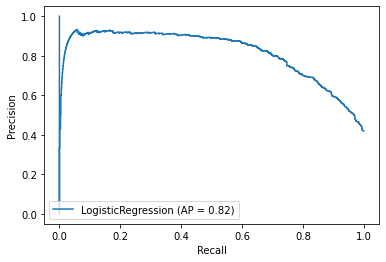

In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

# plot precision-recall curve
y_pred_prob = tweet_classifier.predict_proba(x_test)
precision_recall_curve_values = precision_recall_curve(y_test, y_pred_prob[:,1])
plot_precision_recall_curve(estimator=tweet_classifier, X=x_test, y=y_test)

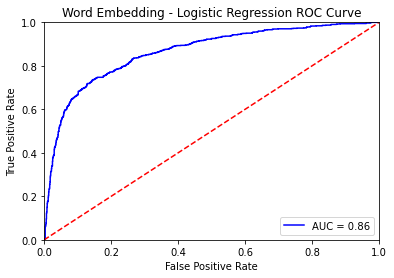

In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# plot ROC
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, y_pred_prob[:,1])
lr_roc_auc = auc(lr_fpr, lr_tpr)


plt.title('Word Embedding - Logistic Regression ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt_clf = DecisionTreeClassifier(random_state=0,max_depth=5).fit(x_train, y_train)

In [17]:
y_pred = dt_clf.predict(x_test)

print("Precision:", round(precision_score(y_test, y_pred, average='binary'),2))
print("Recall:", round(recall_score(y_test, y_pred, average='binary'),2))
print("F1:", round(f1_score(y_test, y_pred, average='binary'),2))
print("Average Precision:", round(average_precision_score(y_test, y_pred),2))

Precision: 0.7
Recall: 0.58
F1: 0.63
Average Precision: 0.58


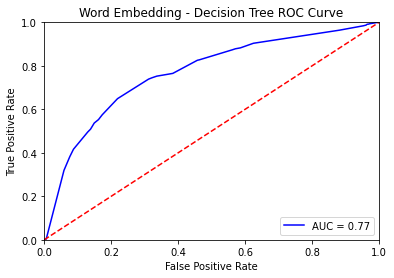

In [18]:
y_pred_prob = dt_clf.predict_proba(x_test)
precision_recall_curve_values = precision_recall_curve(y_test, y_pred_prob[:,1])
# plot_precision_recall_curve(estimator=dt_clf, X=x_test, y=y_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

dt_fpr, dt_tpr, dt_threshold = roc_curve(y_test, y_pred_prob[:,1])
dt_roc_auc = auc(dt_fpr, dt_tpr)

plt.title('Word Embedding - Decision Tree ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf_clf = RandomForestClassifier(n_jobs=2, max_features=9,
                                min_samples_leaf = 10, random_state=0).fit(x_train, y_train)

In [83]:
y_pred = rf_clf.predict(x_test)

print("Precision:", round(precision_score(y_test, y_pred, average='binary'),2))
print("Recall:", round(recall_score(y_test, y_pred, average='binary'),2))
print("F1:", round(f1_score(y_test, y_pred, average='binary'),2))
print("Average Precision:", round(average_precision_score(y_test, y_pred),2))

Precision: 0.83
Recall: 0.63
F1: 0.71
Average Precision: 0.67


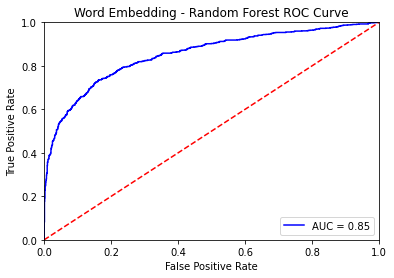

In [84]:
y_pred_prob = rf_clf.predict_proba(x_test)
precision_recall_curve_values = precision_recall_curve(y_test, y_pred_prob[:,1])
# plot_precision_recall_curve(estimator=rf_clf, X=x_test, y=y_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, y_pred_prob[:,1])
rf_roc_auc = auc(rf_fpr, rf_tpr)


plt.title('Word Embedding - Random Forest ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### MLP Neural Net Classifier

In [23]:
from sklearn.neural_network import MLPClassifier

In [24]:
mlp_clf = MLPClassifier(random_state=0, max_iter=300).fit(x_train, y_train)

In [25]:
y_pred = mlp_clf.predict(x_test)

print("Precision:", round(precision_score(y_test, y_pred, average='binary'),2))
print("Recall:", round(recall_score(y_test, y_pred, average='binary'),2))
print("F1:", round(f1_score(y_test, y_pred, average='binary'),2))
print("Average Precision:", round(average_precision_score(y_test, y_pred),2))

Precision: 0.73
Recall: 0.73
F1: 0.73
Average Precision: 0.64


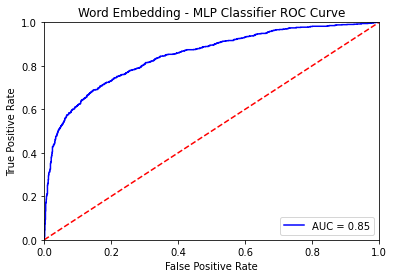

In [26]:
y_pred_prob = mlp_clf.predict_proba(x_test)
precision_recall_curve_values = precision_recall_curve(y_test, y_pred_prob[:,1])
# plot_precision_recall_curve(estimator=mlp_clf, X=x_test, y=y_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

mlp_fpr, mlp_tpr, mlp_threshold = roc_curve(y_test, y_pred_prob[:,1])
mlp_roc_auc = auc(mlp_fpr, mlp_tpr)

plt.title('Word Embedding - MLP Classifier ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Results

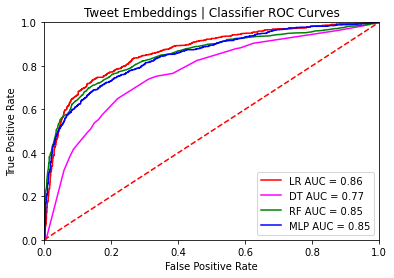

In [35]:
plt.title('Tweet Embeddings | Classifier ROC Curves')
plt.plot(lr_fpr, lr_tpr, 'b', label = 'LR AUC = %0.2f' % lr_roc_auc, color='red')
plt.plot(dt_fpr, dt_tpr, 'b', label = 'DT AUC = %0.2f' % dt_roc_auc, color='magenta')
plt.plot(rf_fpr, rf_tpr, 'b', label = 'RF AUC = %0.2f' % rf_roc_auc, color='green')
plt.plot(mlp_fpr, mlp_tpr, 'b', label = 'MLP AUC = %0.2f' % mlp_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()